## Project ECG - step 1
Read project_ecg_step_1.pdf and 1D_Signal_Processing_Peak_Detection.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.ndimage import correlate
from skimage.filters import threshold_otsu

Load the ECG data from ecg_data1.csv using pandas <br>
The ipynb file and the data file ecg_data1.csv should be in the same file folder  <br>
the ECG signal should be stored in a numpy array  <br>
the Sampling Rate is known to be 1000Hz  <br>

In [2]:
data = pd.read_csv('ecg_data1.csv')
data.head()

,Amp
0,2044.0
1,2044.0
2,2044.0
3,2044.0
4,2044.0


In [3]:
#check missing values
data.isnull().sum()

Amp    0
dtype: int64

In [4]:
#get the signal and convert it to numpy array
x = data['Amp'].values
type(x)

numpy.ndarray

In [5]:
fs = 1000 # sampling rate (Hz)
Ts = 1/fs # sampling intervel (seconds)
N = x.shape[0] # total number of data points in the ECG signal x
Duration= N/fs #seconds

Visualize the ECG signal x

In [6]:
t = np.linspace(0, Duration-Ts, N) # an array of timepoints

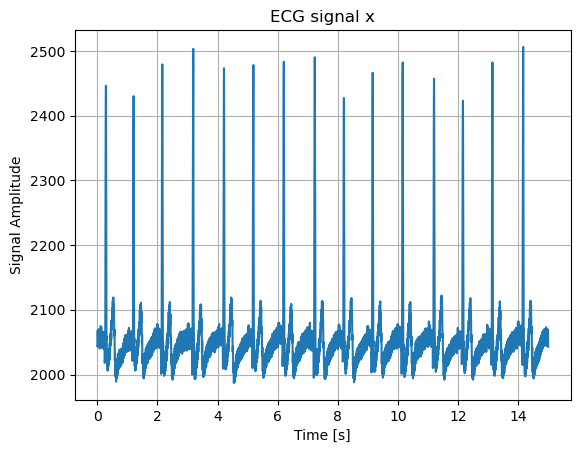

In [7]:
fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x')
ax.grid(True)


Build a GaussianKernel for smoothing the ECG signal x <br>
you may need to adjust the parameters of this kernel

(-0.005, 0.005)

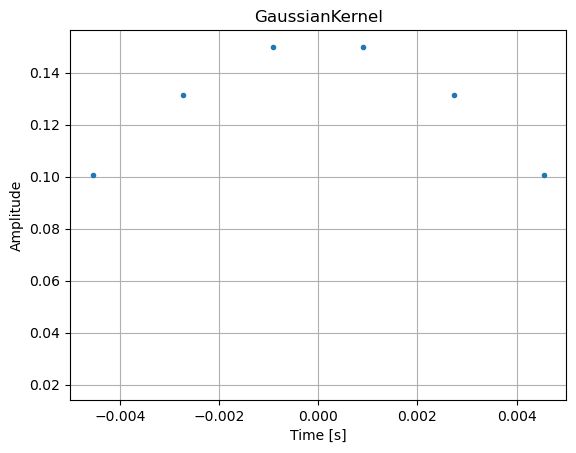

In [8]:
tg = np.linspace(-0.01, 0.01, 11, endpoint=False) 
sigma=0.005
GaussianKernel = np.exp(-tg**2/(2*sigma**2))
GaussianKernel/=GaussianKernel.sum()
fig, ax = plt.subplots()
ax.plot(tg, GaussianKernel, '.')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_title('GaussianKernel')
ax.set_xlim([-0.005, 0.005])

Smooth the ECG signal `x` using cross-correlation (correlate) with GaussianKernel <br>
Name the smoothed signal `x_smoothed` <br>
Visualize the smoothed signal `x_smoothed` and the original signal `x` in a figure

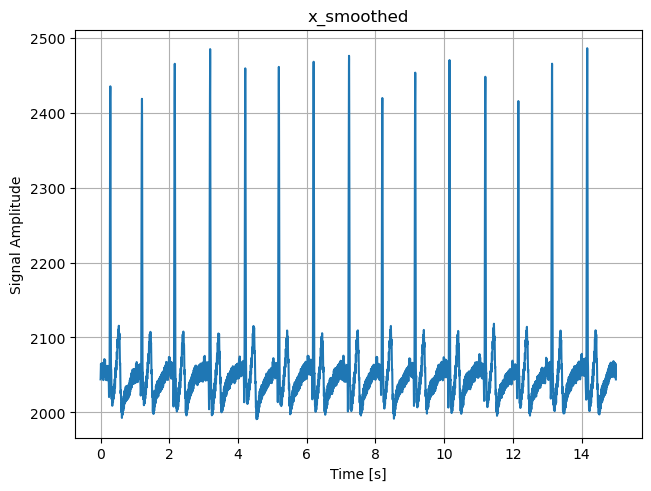

In [9]:
x_smoothed = correlate(x, GaussianKernel, mode='nearest')
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(t, x_smoothed, '-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('x_smoothed')
ax.grid(True)


Perform peak detection on x_smoothed, using two kernels: h1 and h2 <br>

In [10]:
def peak_detector(x):
    #two kernels
    h1 = [-1, 1, 0]
    h2 = [0, 1, -1]
    y = correlate(x, h1, mode='nearest')
    z = correlate(x, h2, mode='nearest')
    #find the indexes of the positive elements in y
    IndexArray1= np.where(y>0) 
    #find the indexes of the positive elements in z
    IndexArray2= np.where(z>0) 
    # find the intersection of IndexArray1 and IndexArray2
    PeakIndexArray = np.where((y>0)&(z>0))[0] 
    return PeakIndexArray

PeakIndexArray=peak_detector(x_smoothed)




Visualize the ECG signal `x` and the peaks detected from x_smoothed (no need to plot x_smoothed)

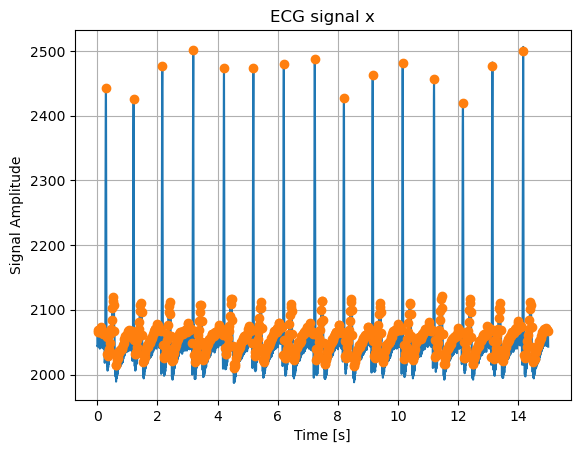

In [11]:
fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.plot(t[PeakIndexArray], x[PeakIndexArray], 'o')
#ax.plot(x_smoothed[PeakIndexArray], 'o') # 'o' to plot dots only
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x')
ax.grid(True)



We need to find the R-peaks from the detected peaks<br>
Select the peaks with amplitude values > threshold <br>
Write code to find the threshold <br>
It is NOT acceptable to simply set threshold to a manually defined number (e.g.,  threshold=2000)

In [12]:
#PeakValueArray=1000+10*np.random.randn(1000)
#PeakValueArray[0:1000:100]=3000
threshold=threshold_otsu(x_smoothed[PeakIndexArray])
print(threshold)
A=x_smoothed[PeakIndexArray]
print(A.shape, x.shape)
IndexArray=np.where( A> threshold)[0]
#IndexArray  index in x_smoothed[PeakIndexArray]
len(IndexArray)


2119.017529208602
(721,) (15000,)


15

In [13]:
RPeakIndexArray=PeakIndexArray[IndexArray]
RPeakIndexArray # index in x or x_smoothed

array([  285,  1205,  2160,  3190,  4212,  5189,  6202,  7232,  8201,
        9159, 10157, 11199, 12160, 13141, 14164])

In [14]:
A=np.array([10, 11, 12, 13, 14, 15])
np.where(A>12)[0]

array([3, 4, 5])

Visualize the R-peaks and the signal `x`

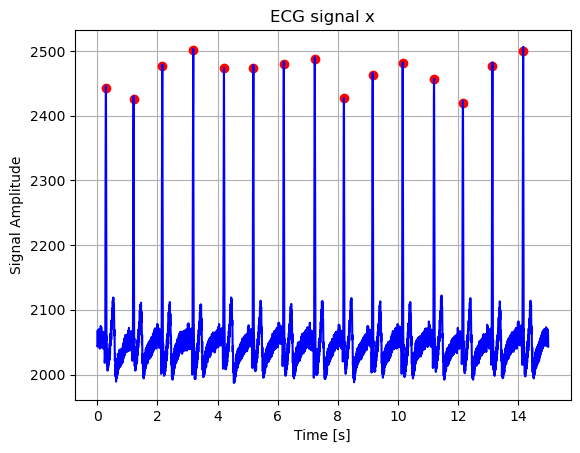

In [15]:
fig, ax = plt.subplots()
ax.plot(t[RPeakIndexArray], x[RPeakIndexArray], 'ro')
ax.plot(t, x, 'b-')
#ax.plot(x_smoothed[PeakIndexArray], 'o') # 'o' to plot dots only
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x')
ax.grid(True)


Calculate heart rate per minute based on the R-peaks and visualize the result

In [16]:
# RPeakIndexArray stores the indexes of the R-peaks in the ECG signal x


HeartRate = np.array(RPeakIndexArray)
for n in range(1, RPeakIndexArray.shape[0]):
    HeartRate[n]=60*fs/(RPeakIndexArray[n]-RPeakIndexArray[n-1])
HeartRate[0] = HeartRate[1]
HeartRate


array([65, 65, 62, 58, 58, 61, 59, 58, 61, 62, 60, 57, 62, 61, 58])

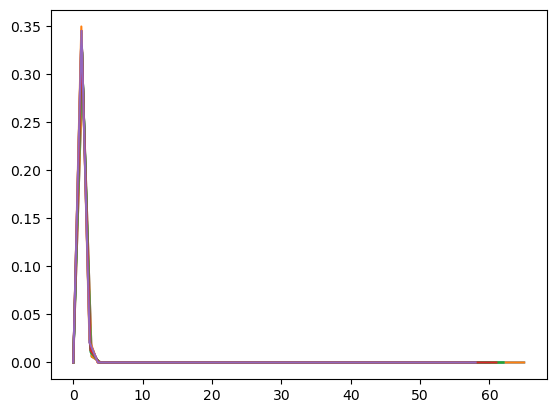

In [27]:
r = np.linspace(0, HeartRate)
u = r**2*np.exp(-r**2)
fig, ax = plt.subplots()
ax.plot(r, u)


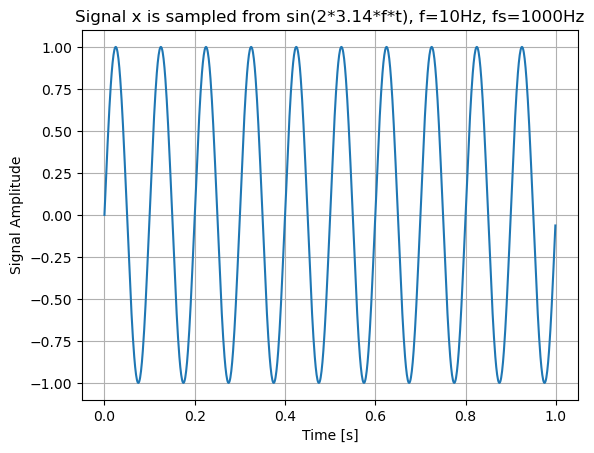

In [20]:
f = 10 
fs = 1000 
Ts=1/fs
Duration = 1 
N = Duration * fs
t = np.linspace(0, Duration-Ts, N) 
pi=np.pi
x = np.sin(2*pi*f*t)
t = np.linspace(0, Duration-Ts, N)
pi=np.pi
x = np.sin(2*pi*f*t)
fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Signal x is sampled from sin(2*3.14*f*t), f=10Hz, fs=1000Hz')
ax.grid(True)